In [2]:
from gekko import GEKKO
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('signal_df.csv')
df

,Time,F_cw,T1,T2,CA1,CA2
0,2021-01-01 07:08:30+00:00,101.428052,440.109595,448.722247,0.092934,0.005774
1,2021-01-01 07:08:40+00:00,101.428052,440.109597,448.722220,0.092935,0.005774
2,2021-01-01 07:08:50+00:00,101.428052,440.109618,448.722201,0.092935,0.005774
3,2021-01-01 07:09:00+00:00,101.428052,440.109649,448.722191,0.092934,0.005774
4,2021-01-01 07:09:10+00:00,101.428052,440.109685,448.722188,0.092934,0.005774
...,...,...,...,...,...,...
955,2021-01-01 09:47:40+00:00,96.555456,443.847866,451.318028,0.078011,0.004296
956,2021-01-01 09:47:50+00:00,96.555456,443.847866,451.318028,0.078011,0.004296
957,2021-01-01 09:48:00+00:00,96.555456,443.847866,451.318028,0.078011,0.004296
958,2021-01-01 09:48:10+00:00,96.555456,443.847866,451.318028,0.078011,0.004296


In [4]:
# for i in range(1, 10):
m1 = GEKKO(remote=False)
m1.time = list(df.index)
K = m1.FV(value=2, ub=10)
K.STATUS = 1
tau = m1.FV(value=1, lb=0, ub=20)
tau.STATUS = 1
y0 = df[['T1']].to_numpy().flatten().tolist()
u0 = df[['F_cw']].to_numpy().flatten().tolist()
y = m1.Var(y0)
# y.FSTATUS = 1
u = m1.Param(u0)
# y.STATUS = 0

ud = m1.Var(u0)
# ud.STATUS = 0
m1.delay(u, ud, steps=1)
yp = m1.Param(y0)
m1.Equation(tau*y.dt() + (y-y0[0]) == K*(ud-u0[0]))
m1.Minimize((y-yp)**2)
m1.options.IMODE = 5
# m1.options.NODES = 2
m1.solve(False)
print(m1.options.OBJFCNVAL)
print(m1.options.SOLVETIME)


79.778041398
0.8716


### Rule-based: IMC method

In [11]:
def ___init__(self):
    self.kc = None
    self.tau_i = None

kp = K[-1]
tau_p = tau[-1]
tau.VALUE = 5

method = 'IMC'

kc = 1/kp
tau_i = tau_p

return kc, tau_i, tau_d

In [7]:
tau[-1]
K[-1]

-0.78101295861

In [4]:
m2 = GEKKO(remote=False)
m2.time = np.linspace(0, 5*tau.value[0], 51)
K = m2.Param(value=K.value[0])
tau = m2.Param(value=tau.value[0])
# y0 = df[['T1']].to_numpy().flatten().tolist()
# u0 = df[['F_cw']].to_numpy().flatten().tolist()
y = m2.CV(y0[0])
y.SP = y0[0]+5
# y.SPLO = y0[0]+4.5
# y.SPHI = y0[0]+5.5
y.status = 1
y.TR_INIT = 2
y.TAU = tau.value
u = m2.MV(u0[0], lb=90, ub=110)
u.DMAX = 5
u.DCOST = 0.001
u.status = 1

m2.Equation(tau*y.dt() + (y-y0[0]) == K*(u-u0[0]))
# m2.Minimize((y-yp)**2)
m2.options.IMODE = 6
m2.options.CV_TYPE = 2
# m1.options.NODES = 2
m2.solve(False)
print(m2.options.OBJFCNVAL)
print(m2.options.SOLVETIME)

28.05805343
0.197


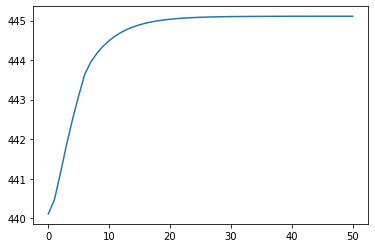

In [5]:
import matplotlib.pyplot as plt

# plt.plot(y[100:200])
plt.plot(y)
# plt.plot(u)

# plt.plot(y0[100:200])
plt.show()

In [211]:
u

[101.4280519, 93.55682152, 99.353893635, 99.807384089, 99.972697862, 100.05659194, 100.10875395, 100.14112594, 100.15941176, 100.1683714, 100.17159745, 100.17151061, 100.16966012, 100.16700567, 100.16411921, 100.16132269, 100.15878086, 100.15656271, 100.15468134, 100.15311929, 100.15184416, 100.15081793, 100.15000233, 100.14936166, 100.14886413, 100.14848228, 100.1481929, 100.14797667, 100.14781778, 100.14770336, 100.14762307, 100.1475687, 100.14753371, 100.147513, 100.14750261, 100.14749945, 100.14750119, 100.14750606, 100.14751274, 100.14752025, 100.1475279, 100.14753522, 100.14754187, 100.14754766, 100.14755249, 100.14755634, 100.14755924, 100.14756126, 100.14756253, 100.14756319, 100.14756342]